In [1]:
# enable to reimport modules
%load_ext autoreload
%autoreload 2

In [29]:
import warnings

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

pd.options.display.max_columns = 999

In [3]:
warnings.filterwarnings('ignore')

In [92]:
train_i = pd.read_csv('../data/train_identity.csv').set_index('TransactionID')
train_t = pd.read_csv('../data/train_transaction.csv').set_index('TransactionID')
test_i = pd.read_csv('../data/test_identity.csv').set_index('TransactionID')
test_t = pd.read_csv('../data/test_transaction.csv').set_index('TransactionID')

In [5]:
submission = pd.read_csv('../data/sample_submission.csv')

In [93]:
train_i = train_i.join(train_t['isFraud'])

In [94]:
train_i.shape

(144233, 41)

In [95]:
test_i.shape

(141907, 40)

In [96]:
train_t.shape

(590540, 393)

In [97]:
test_t.shape

(506691, 392)

In [98]:
train_i.select_dtypes('float').shape

(144233, 23)

In [99]:
train_i.select_dtypes('object').shape

(144233, 17)

In [100]:
train_t.select_dtypes('float').shape

(590540, 376)

In [101]:
train_t.select_dtypes('object').shape

(590540, 14)

# Numerical Plot

In [113]:
def numerical_plot(df):
    for col in df.columns:
        if col != 'isFraud':
            df_false = df.query('isFraud==0')
            df_true = df.query('isFraud==1')
            plt.hist(df_false[col], bins=30, label='False')
            plt.hist(df_true[col], bins=30, label='True')
            plt.legend()
            plt.show()

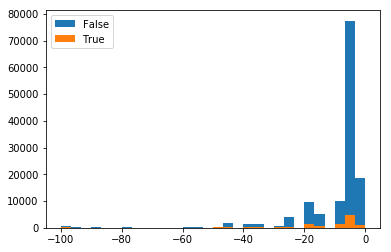

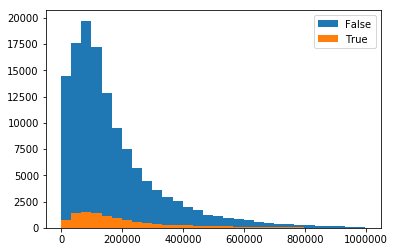

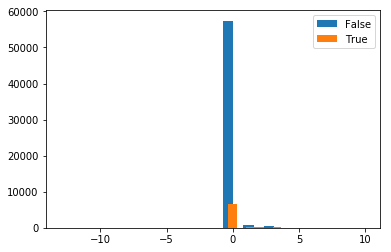

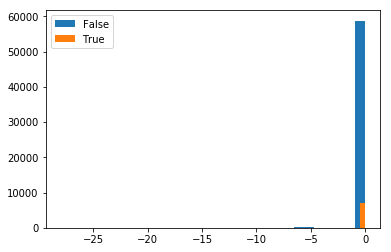

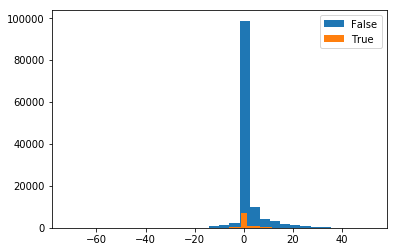

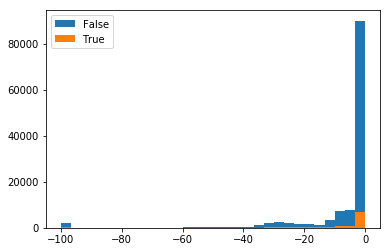

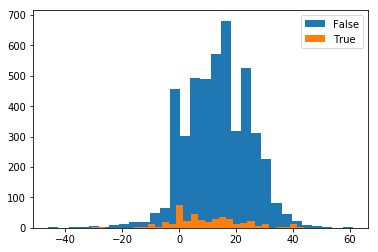

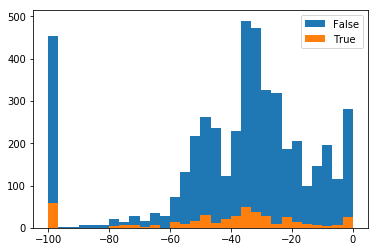

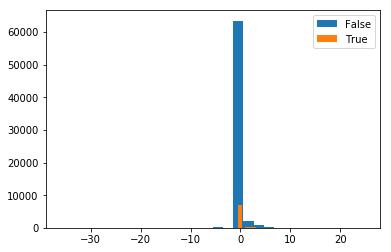

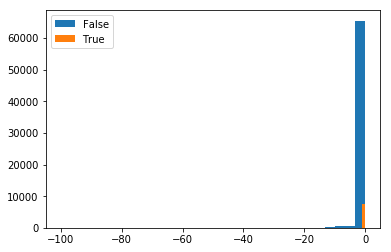

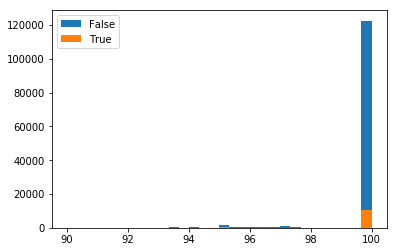

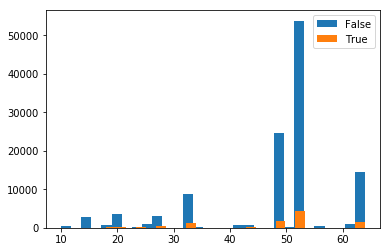

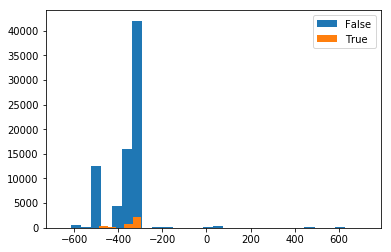

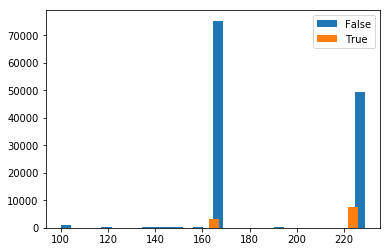

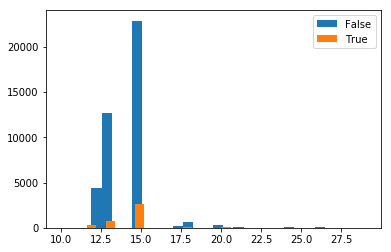

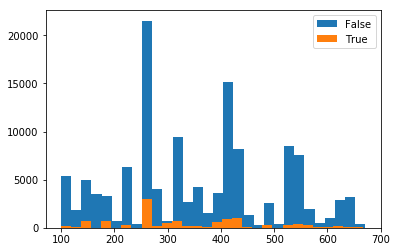

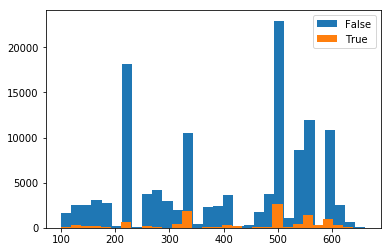

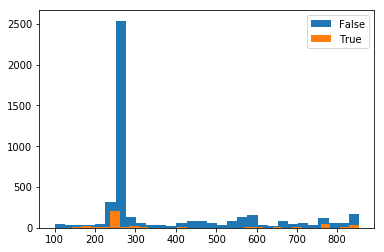

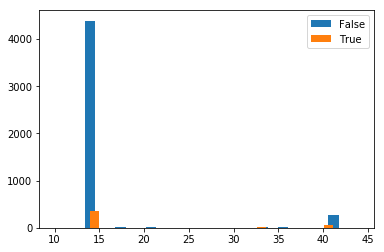

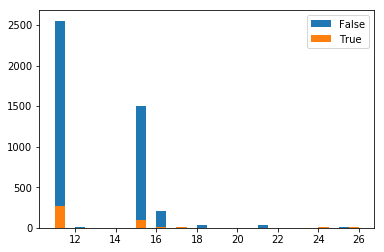

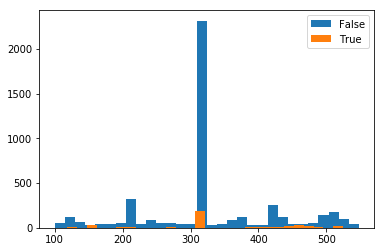

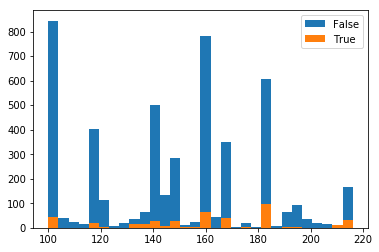

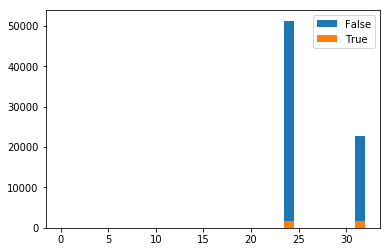

In [114]:
numerical_plot(train_i.select_dtypes(include=['int', 'float']))

# Categorical Plot

In [123]:
def categorical_plot(df):
    for col in df.columns:
        if col != 'isFraud':
            sns.countplot(x=col, hue='isFraud', data=df)
            plt.show()

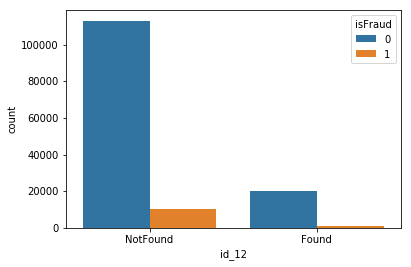

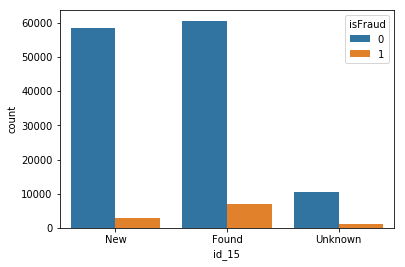

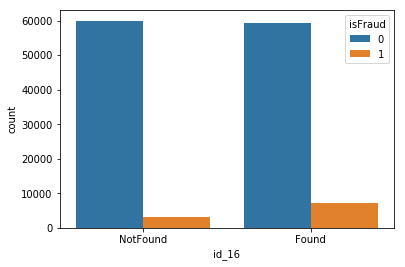

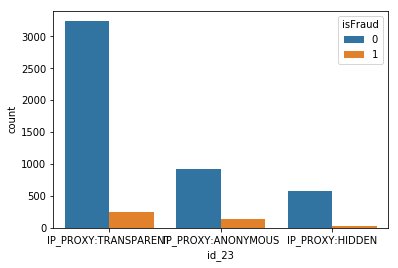

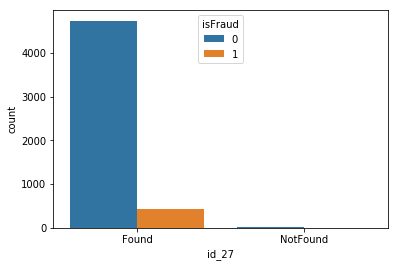

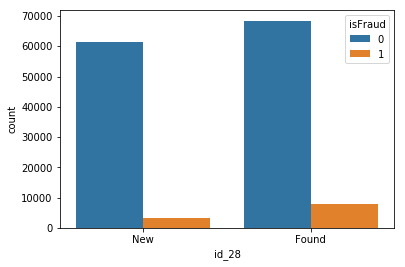

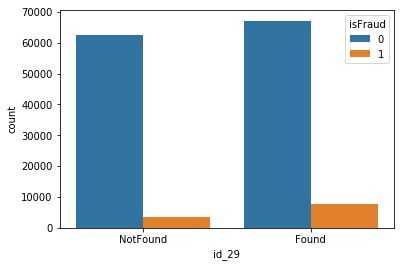

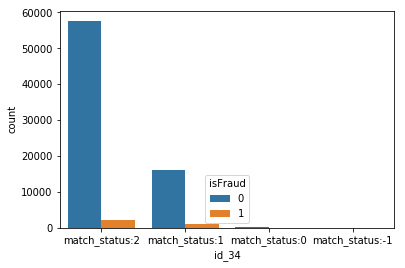

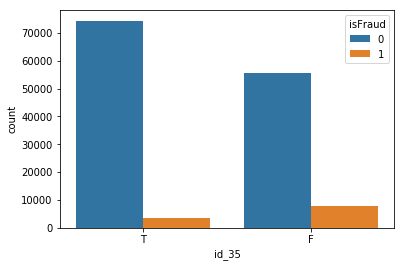

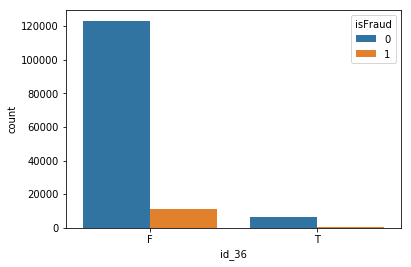

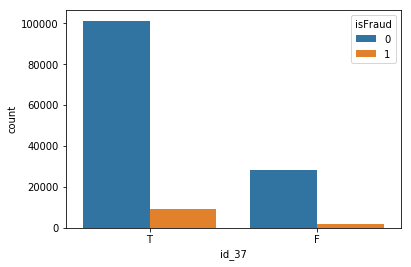

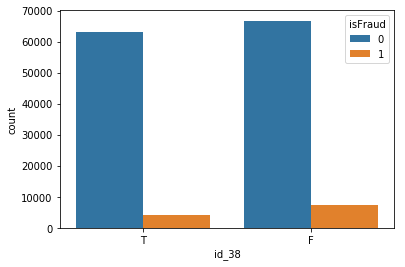

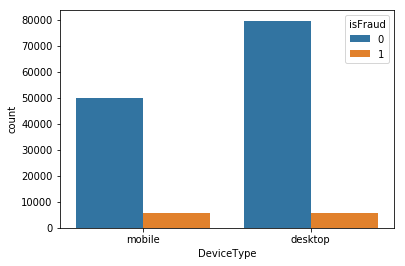

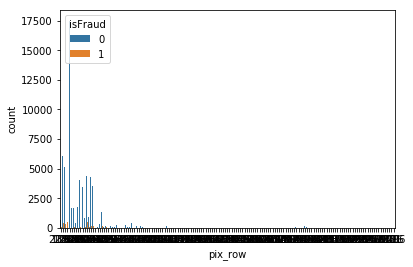

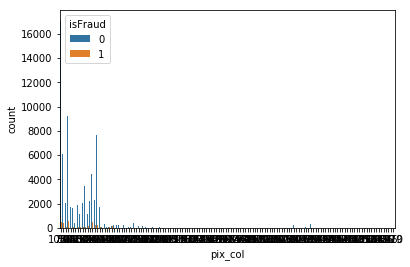

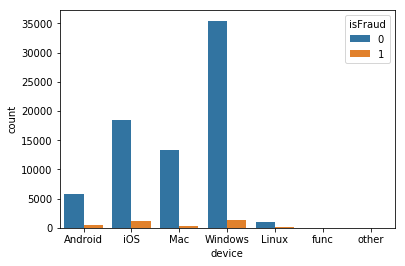

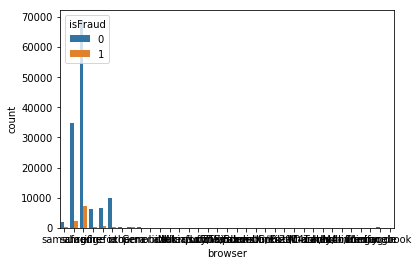

In [173]:
categorical_plot(train_i.select_dtypes(include=['object', 'int']))

In [171]:
def rename_device(x):
    for name in device_names:
        if name in str(x):
            x = name
    return x
device_names = ['Android', 'iOS', 'Mac', 'Windows', 'Linux', 'func']
train_i['device'] = train_i['id_30'].map(lambda x: rename_device(x))
train_i = train_i.drop(columns='id_30')
test_i['device'] = test_i['id_30'].map(lambda x: rename_device(x))
test_i = test_i.drop(columns='id_30')

In [172]:
def rename_browser(x):
    for name in browser_names:
        if name in str(x):
            x = name
    if x == 'Samsung':
        x = 'samsung'
    elif x == 'Firefox':
        x = 'firefox'
    return x
browser_names = [
    'samsung', 'Samsung', 'safari', 'chrome', 'edge', 'firefox', 'Firefox',
    'ie', 'webview', 'Generic', 'opera','android', 'google',
]
train_i['browser'] = train_i['id_31'].map(lambda x: rename_browser(x))
train_i = train_i.drop(columns='id_31')
test_i['browser'] = test_i['id_31'].map(lambda x: rename_browser(x))
test_i = test_i.drop(columns='id_31')

In [169]:
train_i[['pix_row', 'pix_col']] = train_i['id_33'].str.split('x', expand=True)
train_i = train_i.drop(columns='id_33')
test_i[['pix_row', 'pix_col']] = test_i['id_33'].str.split('x', expand=True)
test_i = test_i.drop(columns='id_33')

In [170]:
train_i = train_i.drop(columns='DeviceInfo')
test_i = test_i.drop(columns='DeviceInfo')